In [17]:
##Packages
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import numpy as np
import collections
import datetime

In [3]:
#Import data file
df = pd.read_csv("../Data/Jack Galati.csv")

In [19]:
df.head()

,BATHRM,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,SALEDATE,PRICE,...,STRUCT,GRADE_D,CNDTN_D,EXTWALL_D,ROOF,INTWALL_D,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM
0,4.0,Forced Air,Y,3.0,8.0,5.0,1900.0,2000.0,2012-11-02T00:00:00.000Z,1295000.0,...,6.0,Very Good,Good,Common Brick,2.0,Hardwood/Carp,3.0,2.0,1626,2018-07-22T18:01:43.000Z
1,4.0,Warm Cool,Y,1.0,8.0,3.0,1907.0,2014.0,2014-10-08T00:00:00.000Z,993500.0,...,7.0,Average,Very Good,Common Brick,2.0,Hardwood,1.0,1.0,814,2018-07-22T18:01:43.000Z
2,2.0,Warm Cool,Y,1.0,9.0,3.0,1900.0,2001.0,2003-03-25T00:00:00.000Z,0.0,...,7.0,Average,Good,Common Brick,2.0,Hardwood,1.0,1.0,1831,2018-07-22T18:01:43.000Z
3,4.0,Hot Water Rad,N,1.0,11.0,7.0,1890.0,NaN,2009-06-04T00:00:00.000Z,0.0,...,6.0,Excellent,Average,Brick/Stone,6.0,Hardwood,1.0,4.0,1374,2018-07-22T18:01:43.000Z
4,3.0,Hot Water Rad,N,4.0,11.0,5.0,1948.0,NaN,2013-04-25T00:00:00.000Z,0.0,...,7.0,Very Good,Average,Common Brick,6.0,Hardwood,4.0,0.0,1188,2018-07-22T18:01:43.000Z


In [51]:
#Data cleansing
df["SALEDATE"] = pd.to_datetime(df["SALEDATE"])
df["year"] = pd.to_datetime(df["SALEDATE"]).dt.year

In [15]:
for col in df.columns:
    print(col)

BATHRM
HEAT_D
AC
NUM_UNITS
ROOMS
BEDRM
AYB
YR_RMDL
SALEDATE
PRICE
QUALIFIED
STYLE
STRUCT
GRADE_D
CNDTN_D
EXTWALL_D
ROOF
INTWALL_D
KITCHENS
FIREPLACES
LANDAREA
GIS_LAST_MOD_DTTM


In [10]:
for col in df.columns:
    if col not in df.describe().columns:
        print(col)

HEAT_D
AC
SALEDATE
QUALIFIED
GRADE_D
CNDTN_D
EXTWALL_D
INTWALL_D
GIS_LAST_MOD_DTTM


In [3]:
df_description = df.describe()
print(df_description)

            BATHRM    NUM_UNITS        ROOMS        BEDRM          AYB  \
count  2998.000000  2998.000000  2998.000000  2998.000000  2999.000000   
mean      2.038025     1.182789     7.362575     3.390260  1928.281427   
std       1.065375     0.567685     2.390957     1.130078   109.609813   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     6.000000     3.000000  1913.000000   
50%       2.000000     1.000000     7.000000     3.000000  1928.000000   
75%       3.000000     1.000000     8.000000     4.000000  1947.000000   
max      14.000000     4.000000    39.000000    12.000000  2019.000000   

           YR_RMDL         PRICE        STYLE       STRUCT         ROOF  \
count  1389.000000  2.467000e+03  2998.000000  2998.000000  2998.000000   
mean   2001.203024  3.816048e+05     4.318879     4.950634     3.883256   
std      15.088183  5.576958e+05     1.473054     2.865969     3.316431   
min    1915.000000  0.000000e+00 

In [343]:
statistics.variance(df[pd.notnull(df['LANDAREA'])]['LANDAREA'])

167544227.4187289

1A - (b) - Numeric values

In [116]:
summary_df = pd.DataFrame()
temp_dict = {}
index=0

for column in df_description:
    temp_dict = {
        'name' : column,
        'col_range' : (df[column].max() - df[column].min()),
        'col_mean' : df[column].mean(),
        'col_median' : df[column].median(),
        'col_freq_1_number' : collections.Counter(df[column]).most_common(1)[-1][0],
        'col_freq_1_count' : collections.Counter(df[column]).most_common(1)[-1][1],
        'col_freq_2_number' : collections.Counter(df[column]).most_common(2)[-1][0],
        'col_freq_2_count' : collections.Counter(df[column]).most_common(2)[-1][1],
        'col_freq_3_number' : collections.Counter(df[column]).most_common(3)[-1][0],
        'col_freq_3_count' : collections.Counter(df[column]).most_common(3)[-1][1],
        'col_25_percentile' : np.percentile(df[pd.notnull(df[column])][column], 25),
        'col_50_percentile' : np.percentile(df[pd.notnull(df[column])][column], 50),
        'col_75_percentile' : np.percentile(df[pd.notnull(df[column])][column], 75),
        'col_variance' : statistics.variance(df[pd.notnull(df[column])][column]),
        'col_nulls' : df[column].isnull().sum()
    }
    temp_df = pd.DataFrame(temp_dict, index=[index])
    summary_df = summary_df.append(temp_df)
    index += 1

In [117]:
summary_df

,name,col_range,col_mean,col_median,col_freq_1_number,col_freq_1_count,col_freq_2_number,col_freq_2_count,col_freq_3_number,col_freq_3_count,col_25_percentile,col_50_percentile,col_75_percentile,col_variance,col_nulls
0,BATHRM,14.0,2.038025,2.0,2.0,1091,1.0,1080,3.0,553,1.0,2.0,3.00,1.135023e+00,2
1,NUM_UNITS,4.0,1.182789,1.0,1.0,2617,2.0,270,4.0,74,1.0,1.0,1.00,3.222662e-01,2
2,ROOMS,39.0,7.362575,7.0,6.0,952,7.0,606,8.0,501,6.0,7.0,8.00,5.716677e+00,2
3,BEDRM,12.0,3.390260,3.0,3.0,1470,4.0,697,2.0,460,3.0,3.0,4.00,1.277076e+00,2
4,AYB,2019.0,1928.281427,1928.0,1900.0,203,1925.0,139,1923.0,93,1913.0,1928.0,1947.00,1.201431e+04,1
5,YR_RMDL,103.0,2001.203024,2006.0,2011.0,86,2007.0,72,2005.0,71,1995.0,2006.0,2011.00,2.276533e+02,1611
6,PRICE,11000000.0,381604.839076,238000.0,0.0,831,350000.0,13,325000.0,12,0.0,238000.0,575000.00,3.110246e+11,533
7,STYLE,15.0,4.318879,4.0,4.0,2248,7.0,282,6.0,189,4.0,4.0,4.00,2.169887e+00,2
8,STRUCT,8.0,4.950634,7.0,7.0,1126,1.0,914,8.0,431,1.0,7.0,7.00,8.213778e+00,2
9,ROOF,13.0,3.883256,2.0,2.0,901,1.0,891,6.0,819,1.0,2.0,6.00,1.099871e+01,2


1A - (b) - Non Numeric values

In [14]:
non_numeric_df = pd.DataFrame()
temp_dict = {}
index=0

for column in df.columns:
    if column not in df.describe().columns:
        temp_dict = {
            'name' : column,
            'col_freq_1_number' : collections.Counter(df[column]).most_common(1)[-1][0],
            'col_freq_1_count' : collections.Counter(df[column]).most_common(1)[-1][1],
            'col_freq_2_number' : collections.Counter(df[column]).most_common(2)[-1][0],
            'col_freq_2_count' : collections.Counter(df[column]).most_common(2)[-1][1],
            'col_freq_3_number' : collections.Counter(df[column]).most_common(3)[-1][0],
            'col_freq_3_count' : collections.Counter(df[column]).most_common(3)[-1][1],
            'col_nulls' : df[column].isnull().sum()
        }
        temp_df = pd.DataFrame(temp_dict, index=[index])
        non_numeric_df = non_numeric_df.append(temp_df)
        index += 1

In [15]:
non_numeric_df

,name,col_freq_1_number,col_freq_1_count,col_freq_2_number,col_freq_2_count,col_freq_3_number,col_freq_3_count,col_nulls
0,HEAT_D,Hot Water Rad,1239,Forced Air,925,Warm Cool,785,2
1,AC,Y,1862,N,1136,NaN,2,2
2,SALEDATE,1900-01-01T00:00:00.000Z,646,2018-07-02T00:00:00.000Z,5,2017-04-18T00:00:00.000Z,5,0
3,QUALIFIED,U,1695,Q,1305,Q,1305,0
4,GRADE_D,Average,1049,Above Average,916,Good Quality,580,2
5,CNDTN_D,Average,1609,Good,1060,Very Good,250,2
6,EXTWALL_D,Common Brick,2218,Vinyl Siding,163,Brick/Siding,158,2
7,INTWALL_D,Hardwood,2342,Hardwood/Carp,329,Wood Floor,215,2
8,GIS_LAST_MOD_DTTM,2018-07-22T18:01:43.000Z,3000,2018-07-22T18:01:43.000Z,3000,2018-07-22T18:01:43.000Z,3000,0


In [209]:
plot_df = df[['PRICE']]

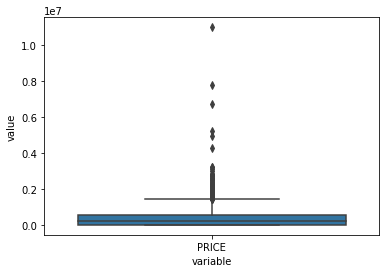

In [214]:
sns.boxplot(x="variable", y="value", data=pd.melt(plot_df))

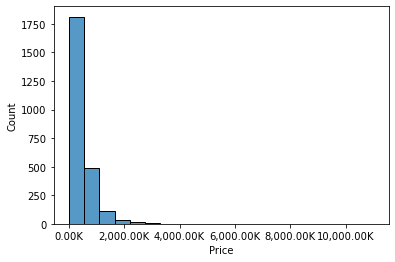

In [257]:
fig = sns.histplot(df['PRICE'], bins=20)
xlabels = ['{:,.2f}'.format(x) + 'K' for x in fig.get_xticks()/1000]
fig.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.show(fig)

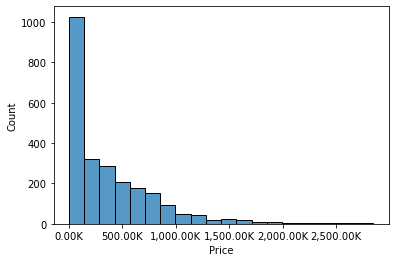

In [9]:
fig = sns.histplot(df[df['PRICE']<3000000]["PRICE"], bins=20)
xlabels = ['{:,.2f}'.format(x) + 'K' for x in fig.get_xticks()/1000]
fig.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.show(fig)

In [297]:
print('Price less than $3M: ' + str(len(df[df['PRICE'] < 3000000])))
print('Price greater than or equal to $3M: ' + str(len(df[df['PRICE'] >= 3000000])))
print('No Price: ' + str(df['PRICE'].isnull().sum()))

Price less than $3M: 2457
Price greater than or equal to $3M: 10
No Price: 533


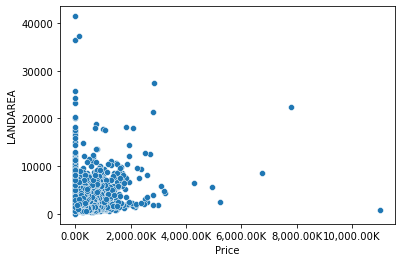

In [6]:
fig = sns.scatterplot(data=df[df["LANDAREA"]<df["LANDAREA"].max()], x="PRICE", y="LANDAREA")
xlabels = ['{:,.2f}'.format(x) + 'K' for x in fig.get_xticks()/1000]
fig.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.show(fig)

In [17]:
df[df['NUM_UNITS']==0]

,BATHRM,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,SALEDATE,PRICE,...,STRUCT,GRADE_D,CNDTN_D,EXTWALL_D,ROOF,INTWALL_D,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM
159,2.0,Warm Cool,Y,0.0,6.0,2.0,1988.0,NaN,1900-01-01T00:00:00.000Z,NaN,...,7.0,Above Average,Average,Common Brick,3.0,Wood Floor,1.0,0.0,1099,2018-07-22T18:01:43.000Z
1453,1.0,Hot Water Rad,N,0.0,7.0,3.0,1923.0,NaN,1900-01-01T00:00:00.000Z,NaN,...,7.0,Average,Average,Common Brick,1.0,Hardwood,1.0,0.0,1636,2018-07-22T18:01:43.000Z
1707,1.0,Hot Water Rad,N,0.0,6.0,3.0,1927.0,NaN,1900-01-01T00:00:00.000Z,NaN,...,6.0,Above Average,Average,Common Brick,6.0,Hardwood,1.0,0.0,1800,2018-07-22T18:01:43.000Z
1755,1.0,Hot Water Rad,Y,0.0,8.0,3.0,1916.0,NaN,1900-01-01T00:00:00.000Z,NaN,...,7.0,Average,Average,Common Brick,6.0,Hardwood,1.0,0.0,1686,2018-07-22T18:01:43.000Z
1774,1.0,Hot Water Rad,N,0.0,8.0,4.0,1923.0,NaN,2013-08-08T00:00:00.000Z,0.0,...,7.0,Average,Average,Common Brick,6.0,Hardwood,1.0,0.0,1800,2018-07-22T18:01:43.000Z
1972,3.0,Forced Air,Y,0.0,6.0,4.0,1900.0,2016.0,2016-10-05T00:00:00.000Z,800000.0,...,1.0,Above Average,Good,Wood Siding,1.0,Hardwood,1.0,0.0,6020,2018-07-22T18:01:43.000Z


In [36]:
df['PRICE'].max()

11000000.0

In [43]:
df['PRICE'].head()

0    1295000.0
1     993500.0
2          0.0
3          0.0
4          0.0
Name: PRICE, dtype: float64

In [34]:
n = 44
w = (df['PRICE'].max()-df['PRICE'].min())/n
print(w)

250000.0


1B Equi Width

In [79]:
#Well, I've made the slowest calculation possible
#I imagine it has something to do with the fact that I check every item against 45 other item sets - Looked it up, yeah I'm meant to create the bins set first
#Works though
equi_bins = []
for item in df['PRICE']:
    for i in range(0, n+1):
        if item >= df['PRICE'].min() + (w*i) and item < df['PRICE'].min() + (w*(i+1)):
            equi_bins.append(str(df['PRICE'].min() + (w*i)) + "-" + str(df['PRICE'].min() + (w*(i+1))))

1B Equi Depth

In [117]:
pd.qcut(price_list, 30, precision=0, duplicates='drop')

0       (1100000.0, 1450000.0]
1        (918200.0, 1100000.0]
2              (-1.0, 98000.0]
3              (-1.0, 98000.0]
4              (-1.0, 98000.0]
                 ...          
2995      (129000.0, 160000.0]
2996                       NaN
2997           (-1.0, 98000.0]
2998      (348740.0, 389720.0]
2999                       NaN
Name: PRICE, Length: 3000, dtype: category
Categories (20, interval[float64]): [(-1.0, 98000.0] < (98000.0, 129000.0] < (129000.0, 160000.0] < (160000.0, 195000.0] ... (825000.0, 918200.0] < (918200.0, 1100000.0] < (1100000.0, 1450000.0] < (1450000.0, 11000000.0]]

1B Min-Max Normalisation

In [118]:
#There's probably a function to do this, but lets make it ourselves instead
def minmax(A, minimum, maximum, new_min, new_max):
    return(((A-minimum) / (maximum-minimum))*(new_max-new_min)+new_min)

In [125]:
minmax_normalisation = minmax(df['PRICE'], df['PRICE'].min(), df['PRICE'].max(), 0, 1)

In [127]:
minmax_normalisation.head(10)

0    0.117727
1    0.090318
2    0.000000
3    0.000000
4    0.000000
5    0.135909
6    0.169545
7    0.100000
8         NaN
9    0.032727
Name: PRICE, dtype: float64

1B Z-Score Normalisation

In [128]:
#Lets make another function
def zscore(A, Mean, StdDev):
    return((A-Mean)/StdDev)

In [129]:
zscore_normalisation = zscore(df['PRICE'], df['PRICE'].mean(), df['PRICE'].std())

In [130]:
zscore_normalisation.head(10)

0    1.637802
1    1.097185
2   -0.684253
3   -0.684253
4   -0.684253
5    1.996420
6    2.659864
7    1.288149
8         NaN
9   -0.038739
Name: PRICE, dtype: float64

1B Discretise AYB

In [136]:
print(df['AYB'].min())
print(df['AYB'].max())

0.0
2019.0


In [183]:
Discretise_List = []
for i in df['AYB']:
    if i <= 1800:
        val = "Very Old"
    elif i <= 1950:
        val = "Old"
    elif i <= 2000:
        val = "New"
    else:
        val = "Very New"
    Discretise_List.append(val)

In [184]:
Discretise_List

['Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Very New',
 'Old',
 'Old',
 'Very New',
 'New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Very New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'New',
 'New',
 'New',
 'Very New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Very New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'New',
 'New',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'New',
 'Old',
 'Old',

In [188]:
df['CNDTN_D'].unique()

array(['Good', 'Very Good', 'Average', 'Fair', nan, 'Poor', 'Excellent'],
      dtype=object)

In [191]:
Binarise_List = []
for i in df['CNDTN_D']:
    if i in ("Good", "Very Good", "Excellent"):
        val = 1
    else:
        val = 0
    Binarise_List.append(val)

In [193]:
Binarise_List

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
